## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [66]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import seaborn as sns
import matplotlib.pyplot as plt

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('E:/Nextcloud/Universidad/Analisis de datos/Tarea 3/Dataset Regresion lineal/archive/CAR DETAILS FROM CAR DEKHO.csv')

In [12]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [14]:
# Descripción de los datos
Datos.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


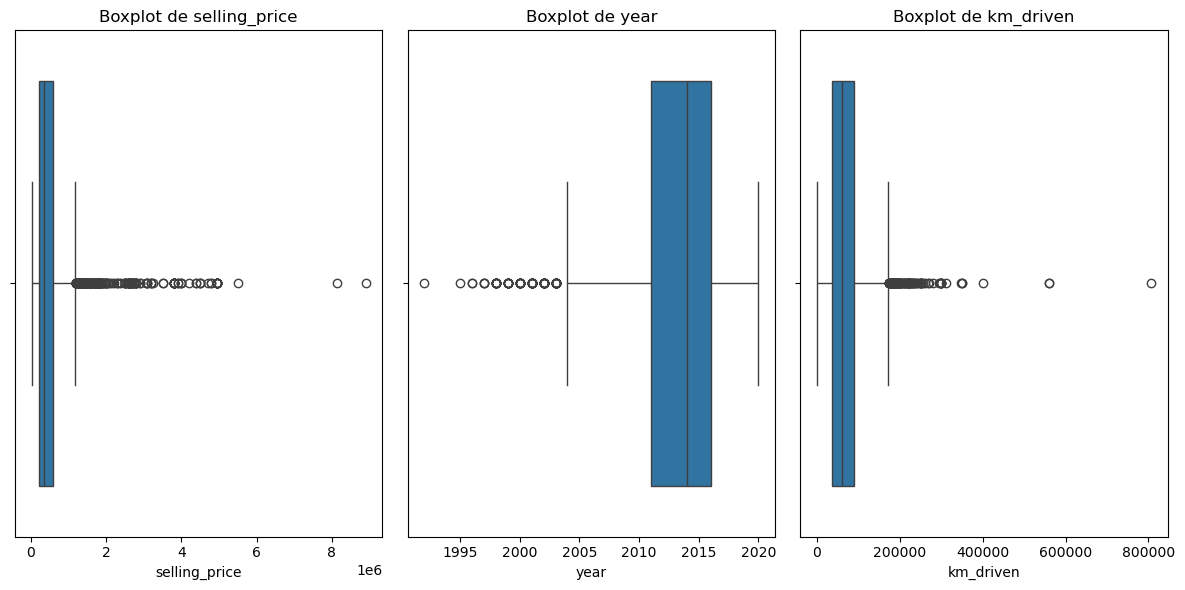

In [23]:
# Identificar las columnas numéricas que podrían tener valores atípicos
columnas_numericas = ['selling_price', 'year', 'km_driven']

# Boxplot para visualizar los valores atípicos
plt.figure(figsize=(12, 6))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=Datos[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [19]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en precio de venta (selling_price): ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en Año (year) : ",Datos['year'].isin([0]).sum())
print("Cantidad de Registros con cero en kilometros (km_driven) ",Datos['km_driven'].isin([0]).sum())

Cantidad de Registros con cero en precio de venta (selling_price):  0
Cantidad de Registros con cero en Año (year) :  0
Cantidad de Registros con cero en kilometros (km_driven)  0


In [26]:
# Calcular los percentiles y el rango intercuartílico (IQR)
for columna in columnas_numericas:
    Q1 = Datos[columna].quantile(0.25)
    Q3 = Datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar los valores atípicos
    outliers = Datos[(Datos[columna] < limite_inferior) | (Datos[columna] > limite_superior)]
    
    print(f"Valores atípicos en {columna}:")
    print(outliers[[columna]].head())  # Mostrar los primeros valores atípicos
    print(f"Cantidad de valores atípicos en {columna}: {len(outliers)}\n")

Valores atípicos en selling_price:
    selling_price
12        1650000
25        1650000
27        1195000
29        1964999
30        1425000
Cantidad de valores atípicos en selling_price: 271

Valores atípicos en year:
     year
61   1996
137  1998
141  2003
149  2002
187  2003
Cantidad de valores atípicos en year: 105

Valores atípicos en km_driven:
     km_driven
32      175900
69      350000
70      230000
159     175000
197     230000
Cantidad de valores atípicos en km_driven: 110



In [32]:
# Calcular los percentiles y el rango intercuartílico (IQR) y eliminar los valores atípicos
for columna in columnas_numericas:
    Q1 = Datos[columna].quantile(0.25)
    Q3 = Datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar los datos para mantener solo los valores dentro del rango permitido
    Datos = Datos[(Datos[columna] >= limite_inferior) & (Datos[columna] <= limite_superior)]

# Ver cuántas filas hay después de eliminar los valores atípicos
print(f"Filas restantes después de eliminar los valores atípicos: {len(Datos)}")

Filas restantes después de eliminar los valores atípicos: 3858


In [34]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3858 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3858 non-null   object
 1   year           3858 non-null   int64 
 2   selling_price  3858 non-null   int64 
 3   km_driven      3858 non-null   int64 
 4   fuel           3858 non-null   object
 5   seller_type    3858 non-null   object
 6   transmission   3858 non-null   object
 7   owner          3858 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.3+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

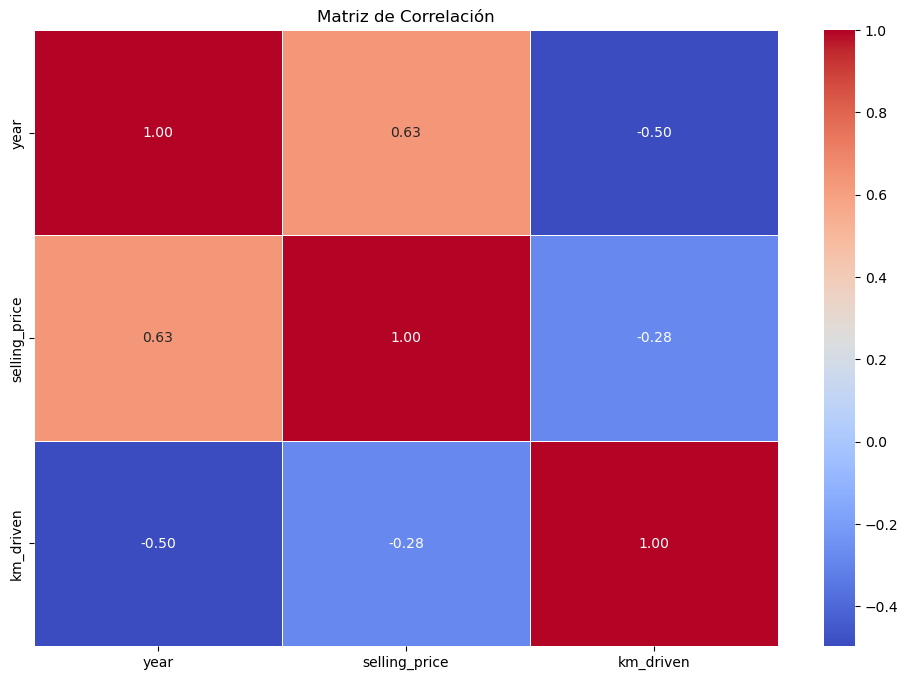

In [45]:
# Seleccionar solo las columnas numéricas
columnas_numericas = Datos.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlacion = columnas_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [47]:
# Definir la variable dependiente (y) y las variables independientes (X)
X = Datos.drop('selling_price', axis=1)  # Eliminar la columna 'selling_price' de X
y = Datos['selling_price']  # Variable dependiente

# Convertir las variables categóricas en variables numéricas (usaremos One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Aplicar SelectKBest para seleccionar las características más relevantes
selector = SelectKBest(score_func=f_regression, k='all')  # 'all' para ver todas las puntuaciones
selector.fit(X, y)

# Mostrar las puntuaciones de las características
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(scores)

                                            Feature        Score
0                                              year  2578.820491
1318                                    fuel_Diesel   480.408224
1321                                    fuel_Petrol   413.206528
1                                         km_driven   331.766219
1322                         seller_type_Individual   187.855707
...                                             ...          ...
1181          name_Tata Tiago 1.05 Revotorq XZ Plus     0.000016
1200                name_Tata Zest Quadrajet 1.3 XM     0.000016
149   name_Ford Endeavour Hurricane Limited Edition     0.000016
222                       name_Honda Amaze S Diesel     0.000016
668                           name_Mahindra Xylo E6     0.000016

[1329 rows x 2 columns]


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [52]:
# Definir la variable dependiente (y) y las variables independientes (X)
X = Datos.drop('selling_price', axis=1)  # Eliminar la columna 'selling_price' de X
y = Datos['selling_price']  # Variable dependiente

# Convertir las variables categóricas en variables numéricas (usaremos One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Dividir el dataset en 75% entrenamiento y 25% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Ver el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 2893
Tamaño del conjunto de prueba: 965


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [60]:
# Crear una instancia del modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Ver los coeficientes del modelo
print(f"Coeficientes del modelo: {modelo.coef_}")
print(f"Intersección (bias): {modelo.intercept_}")

Coeficientes del modelo: [ 2.69763101e+04 -5.98274924e-01 -9.01254940e+10 ... -1.39485357e+04
  9.25935989e+04 -2.23934479e+04]
Intersección (bias): -541748963832.9693


## 6. Evaluar el desempeño del modelo en el conjunto de Test

In [72]:
# Hacer predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calcular RMSE manualmente
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 11807600199.028145
Mean Squared Error (MSE): 1.7314401544847308e+21
Root Mean Squared Error (RMSE): 41610577435.127365
R²: -28820197697.227573


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

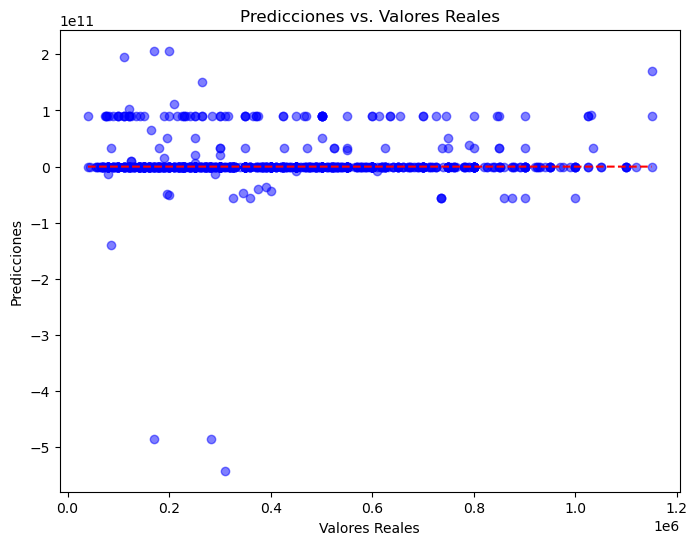

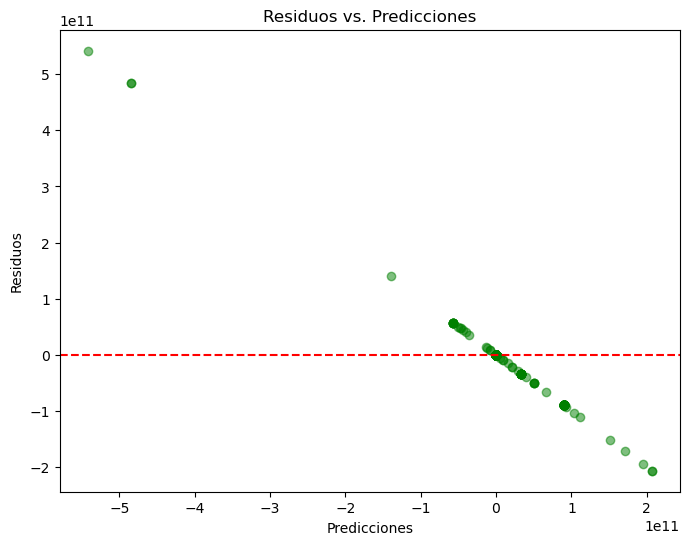

In [76]:
# Gráfico de dispersión: Predicciones vs. Valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de identidad
plt.title("Predicciones vs. Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

# Gráfico de residuos: Diferencia entre predicciones y valores reales
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuos vs. Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

R² (R-cuadrado): Mide qué tan bien las predicciones coinciden con los valores reales. Un valor cercano a 1 indica que el modelo explica bien la variabilidad de los datos.

MAE, MSE, RMSE: Nos dan una idea de cuán precisas son nuestras predicciones. Un RMSE bajo indica que el modelo tiene un buen ajuste a los datos.

Gráficos: Los gráficos nos permiten verificar visualmente la calidad del modelo:

Si los puntos en el gráfico de dispersión están cerca de la línea roja, el modelo está haciendo buenas predicciones.

En el gráfico de residuos, si los puntos están distribuidos aleatoriamente alrededor de cero, eso sugiere que el modelo no tiene sesgo sistemático.

Coeficientes del modelo: Los coeficientes del modelo indican la relación entre las características y el precio de venta. Por ejemplo, si el coeficiente de year es positivo, eso indica que, en promedio, los autos más nuevos tienen un precio más alto.